In [9]:
import pandas as pd
import os
os.chdir(r"C:\Users\gawon\datacampus")

In [19]:
#파일 읽기
pop_seoul = pd.read_csv('.\서울시 주민등록 연앙인구.txt', delimiter='\t', thousands=",")
pop_seoul.head()

,기간,자치구,동,구분,계,0~4세,5~9세,10~14세,15~19세,20~24세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상+
0,2020,합계,합계,계,9533412,"285,507",356876,"369,851","427,350",631878,...,732788,689251,496050,"385,834","289,717","178,206","81,872","29,510","6,769",961
1,2020,합계,합계,남자,4642653,"146,912",182974,"190,281","219,321",303776,...,356333,326997,233225,"177,616","130,498","72,558","26,993","7,379","1,550",178
2,2020,합계,합계,여자,4890760,"138,596",173902,"179,570","208,030",328102,...,376455,362254,262825,"208,218","159,219","105,648","54,879","22,131","5,219",783
3,2020,종로구,소계,계,144866,"3,309",4549,"5,120","6,182",10602,...,12160,10735,7637,"6,245","5,450","3,682","1,749",639,169,26
4,2020,종로구,소계,남자,70613,"1,668",2297,"2,575","3,099",4976,...,6180,5409,3744,"2,842","2,369","1,517",642,189,52,6


In [20]:
#필요한 열 선택
pop_seoul = pop_seoul[['자치구', '동', '구분', '20~24세', '25~29세', '30~34세', '35~39세']]
pop_seoul.head(10)

,자치구,동,구분,20~24세,25~29세,30~34세,35~39세
0,합계,합계,계,631878,816546,"719,526",756788
1,합계,합계,남자,303776,402081,"359,045",379353
2,합계,합계,여자,328102,414466,"360,482",377436
3,종로구,소계,계,10602,12668,"9,995",9796
4,종로구,소계,남자,4976,6526,"5,005",4820
5,종로구,소계,여자,5627,6142,"4,991",4976
6,종로구,사직동,계,495,721,697,691
7,종로구,사직동,남자,226,336,319,286
8,종로구,사직동,여자,269,385,379,405
9,종로구,삼청동,계,152,181,173,192


In [21]:
#강남구로 데이터 전처리
pop_seoul = pop_seoul.loc[pop_seoul.자치구 == '강남구',:]
pop_seoul.head()

,자치구,동,구분,20~24세,25~29세,30~34세,35~39세
1143,강남구,소계,계,33299,40651,"39,138",42965
1144,강남구,소계,남자,16262,19181,"18,133",19461
1145,강남구,소계,여자,17037,21470,"21,005",23504
1146,강남구,신사동,계,1021,1267,"1,179",1213
1147,강남구,신사동,남자,481,563,515,544


In [22]:
#30~34세 값에 있는 콤마 제거
pop_seoul['30~34세'] = pop_seoul['30~34세'].str.replace(',','')
pop_seoul.head()

,자치구,동,구분,20~24세,25~29세,30~34세,35~39세
1143,강남구,소계,계,33299,40651,39138,42965
1144,강남구,소계,남자,16262,19181,18133,19461
1145,강남구,소계,여자,17037,21470,21005,23504
1146,강남구,신사동,계,1021,1267,1179,1213
1147,강남구,신사동,남자,481,563,515,544


In [23]:
#숫자로 변환
pop_seoul['30~34세'] = pd.to_numeric(pop_seoul['30~34세'])

In [24]:
#20~30세 합
pop_seoul['20~30대'] = pop_seoul['20~24세'] + pop_seoul['25~29세'] + pop_seoul['30~34세'] + pop_seoul['35~39세']
pop_seoul = pop_seoul[['자치구', '동', '구분', '20~30대']]
pop_seoul.head()

,자치구,동,구분,20~30대
1143,강남구,소계,계,156053
1144,강남구,소계,남자,73037
1145,강남구,소계,여자,83016
1146,강남구,신사동,계,4680
1147,강남구,신사동,남자,2103


In [25]:
# 남여 구별 X
pop_seoul = pop_seoul.loc[pop_seoul.구분 == '계',:]
pop_seoul = pop_seoul.drop([1143])
pop_seoul.head()

,자치구,동,구분,20~30대
1146,강남구,신사동,계,4680
1149,강남구,논현1동,계,10319
1152,강남구,논현2동,계,7985
1155,강남구,삼성1동,계,4009
1158,강남구,삼성2동,계,8977


In [27]:
#csv파일로 저장
pop_seoul.to_csv("강남구 행정동별 거주인구수.csv", encoding='utf-8')

<function matplotlib.pyplot.show(close=None, block=None)>

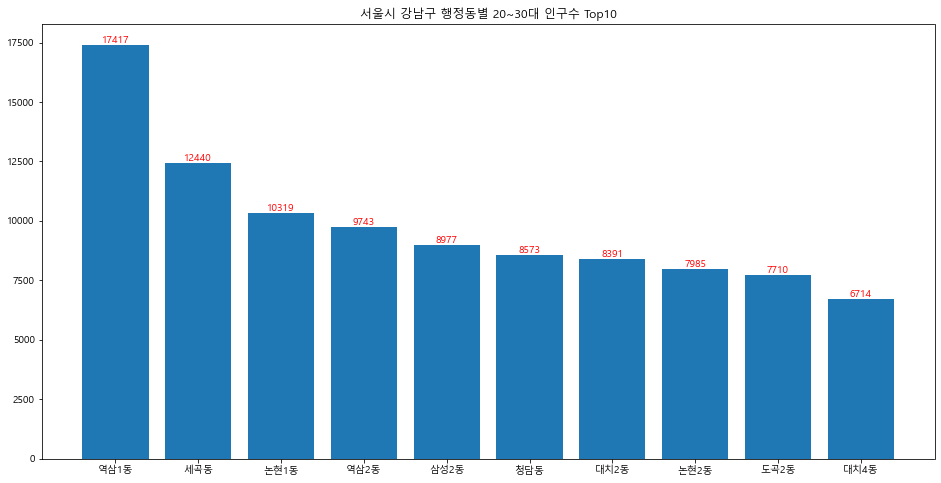

In [18]:
#Top10 그래프 보기
pop_seoul = pop_seoul.sort_values(by='20~30대',ascending=False)[:10]

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.figure(figsize=(16,8))

plt.bar(pop_seoul['동'], pop_seoul['20~30대'])
for x,y in enumerate(list(pop_seoul['20~30대'])):
    plt.text(x, y, y, fontsize=10, color='#ff0000',
            horizontalalignment='center', verticalalignment='bottom')
    
plt.title('서울시 강남구 행정동별 20~30대 인구수 Top10')
plt.show